# Projet Ademe

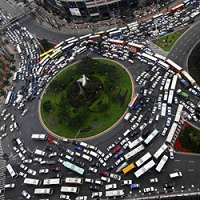

L'équipe R&D constitué de
- LEJEUNE Pierre
- MAILLARD Florian
- LE MEUR Tristan
- LEFORESTIER Romain

## Contexte : 
L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

En tant que membre CesiCDP une organisation déja implamtée dans le domaine et ayant réalisé plusieurs études sur le thème de la Mobilité Multimodale intelligente, nous souhaitons répondre à cet appel afin d'obtenir de nouveaux marchés pour continuer à développer notre activité. Nous décidons d'orienter notre étude sur la gestion de tournées de livraison en proposant un solution pour calculer sur un réseau routier donné une tournée de livraison (de l'ordre du millier) afin de minimiser la durée totale de la tournée en respectant des contraintes pré-établies.

## <a id="contraintes"> Contraintes retenues </a>
 - Durant une tournée, les collaborateurs doivent livrer différents types d'objets. Chaque type d'objet devra donc être récupéré à un point de collecte spécifique.
 - Pour des soucis de réalisme et en vue d'une variation du traffic importante, nous avons décidé de faire varier au cours du temps la durée de parcours d'une arête (on fait varier sa longueur)

## Formalisation de la situation
Pour apporter une réponse à ce problème, nous allons d'abord modéliser la situation. Cela inclut une représentation du problème, des données ainsi que de l'objectif à optimiser.
 
Nous avons en notre possession une carte sur laquelle un nombre N de villes sont positionnées dans lesquelles nous effectuons notre tournée. Ces villes sont reliées entre elles par un certain nombre M de routes.
Nous notons V l'ensemble des villes de cette carte et E l'ensemble des routes les reliants.

Nous ponvons modéliser cette carte avec un graphe G tels que G(V,E).

### Objectifs
Notre objectif est donc de proposer un algorithme qui va prendre le graphe G en entrée et qui va fournir en un temps raisonnable un chemin passant par les villes dans lesquelles les colis doivent être livrés.
La solution sera une liste contenant toutes les villes du graphe rangées par ordre de visite de façon à minimiser certaines variables en fonction des contraintes retenues. La contrainte initiale consiste à partir du point de dépot et d'y revenir, ce qui est formalisé par un cycle ayant pour départ et arrivée le point de dépot.

Les différentes variables à minimiser sont choisies (au lancement de l'algorithme) parmi la liste suivante : 
- le nombre de Kilomètres parcourus
- le temps de trajet
- le coût de trajet
- etc..

Enfin il faut pouvoir respecter <a href="#contraintes"> les contraintes definies plus haut </a>.

Pour modéliser ces objectifs nous pouvons dire que cela revient à trouver un cycle tout en minimisant une certaine valeure K (qui correspond aux paramètres situés ci-dessus). On peut donc rapporter cette situation au problème du voyageur incomplet (quand on ne prend pas en compte nos contraintes)
Nous avons donc un graphe pondéré dont le poids des arêtes va changer selon le paramètre à minimiser ainsi que les contraintes prises en compte.

Nous allons maintenant prouver que ce problème dérive du problème du voyageur !

## Démonstration

Pour prouver que ce problème est un problème NP-complet, on va essayer de montrer qu'il se rapporte à celui du voyageur qui est lui-même un problème NP-Complet.
En effet, pour prouver qu'un problème est NP-complet il faut prouver que ce problème dérive d'une instance appartenant déjà à la classe NP-complet.
Ainsi on peut essayer de montrer la NP-complétude de notre problème en le dérivant en une instance de celui du voyageur.

### Problème du voyageur incomplet

On montre dans un premier temps que la situation sans contrainte est un problème NP-Complet, puisqu'il peut se ramener à un problème du voyageur incomplet.

En partant de la situation formalisée, le graphe G(V, E) possède un point de départ (étant le seul point de dépot), est connexe (un chemin reliant une ville à n'importe quelle autre ville existe) mais pas complet (pas forcément de liaison directe entre chaque ville).

En effet, pour effectuer une tournée, on part d'un point de dépôt qui est donc un sommet du graphe G. Nous avons une liste d'objets à livrer avec pour chacun la ville de livraison. Nous avons donc un sous ensemble de sommets du graphe G à visiter. Dans notre cas certaines villes ne sont pas reliées entres elles nous sommes donc dans un graphe incomplet

Le problème du voyageur incomplet étant un cas particulier du problème de voyageur, on démontre aisément qu'il est aussi NP-Complet par réduction polynomiale :

On part du graphe G étant incomplet et connexe. On relie ensuite chaque sommet non directement relié avec une arête ayant le poids du plus court chemin entre ces deux sommet dans le graphe G pour finalement construire le graphe G' complet. \
Ce graphe G' modélise le problème du voyageur de commerce (complet) qui est NP-Complet.
Dans le pire des cas, la complexité de la réduction est polynomiale (d'au plus (n-1)^2). En effet, il faut ajouter au plus n(n-1) arêtes (avec n le nombre de sommet) moins le nombre d'arête minimal de G (Un graphe ayant le même ensemble de sommets que G, étant connexe, et ayant le minimum d'arête est un arbre. Un arbre possède n-1 arrêtes): n(n-1) - (n-1) = (n-1)^2 \
Pour repasser du grahe G' au graphe G, il suffit de supprimer les arêtes créées lors de la réduction et de reprendre les chemins qui avaient été utilisés pour les créer (de même pour les solutions).

### Ajout des contraintes

#### Contrainte de variation du poids des arêtes en fonction du temps

Le changement de poids sur les arêtes en fonction du trafic sera représenté par une fonction avec le temps en variable permettant de  donner le poids de l'arête au cours de la journée. \
De ce fait, le graphe ne respecte plus l'inégalité triangulaire. Cependant, cela ne change rien à la situation précédente : seul certains algorithmes ne seront plus applicables. \
Cette contrainte s'applique uniquement si le poids dépend en partie du temps (Exemples : temps de parcours, consommation). À l'inverse, on peut imaginer baser le poids des arêtes uniquement sur la distance entre chaque ville, autrement dit indépendant du temps.

#### Contrainte d'ajout de points de dépôt

L'ajout des points de dépôt ne nécessitant pas de modifier le graphe, la complexité ne devrait pas changer. Les algorithmes choisis pourront tout de même prendre d'autres données en entrées, telles que la liste des villes avec dépôt et le type d'objet qu'un dépôt contient. \
La seule conséquence évidente de cette contrainte (qui ne modifie en aucun cas le graphe) réside dans le fait que chaque sommet dépôt contenant un type d'objet particulier devra être visité pour récupérer les colis avant de pouvoir les livrer.

## Bibliographie

- <a href="https://stackoverflow.com/questions/64194953/traveling-salesman-problem-when-not-all-cities-are-connected-and-with-the-possib">Preuve de la NP-Complétude du problème du voyageur de commerce incomplet</a>
- <a href="https://univ.scholarvox.com/reader/docid/88817457/page/214">Démarche de démonstration de NP-Complétude</a>
- <a href="https://uwspace.uwaterloo.ca/bitstream/handle/10012/4906/EmamiTaba_MahsaSadat.pdf?sequence=1">Thèse sur le Problème du voyageur de commerce incomplet</a>